In [1]:
from scipy.io import netcdf
from matplotlib import pyplot as plt
import calculations as calc
import numpy as np

In [2]:
nc = netcdf.netcdf_file("data/era-int_1979-2019-mm-l70-u.nc")
sing = netcdf.netcdf_file("data/qbo_index_Singapore_70-10hPa_1976-2017.nc")

<h3>Different possibilities to define qbo</h3>

In [3]:
print(calc.derive.__doc__)


    Derive time series for a given index from a map.

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, longitude, latitude
        lon (int): Longitude of starting point
        lat (int): Latitude of starting point
        level (int, optional): Level from which the index should be derived
            Defaults to 0
        lon_step (int, optional): Stepsize in Longitude-dimension:
            How many points in the horizontal direction should be taken into account.
            Defaults to 0
        lat_step (int, optional): Stepsize in Latitude-dimension:
            How many points in the vertical direction should be taken into account.
            Defaults to 0

    Returns:
        List containing the mean values of all values in the respective index per time
    


In [4]:
u = nc.variables["u"]

my_qbo = calc.derive(u[:,:,:,:], lon = 148, lat = 126, level = 0, lon_step = 0, lat_step = 0)

In [5]:
alternative_qbo = calc.derive(u[:, :, :, :], lon = 256, lat = 126, level = 0, lon_step = 256, lat_step = 3)

In [6]:
ref_qbo = sing.variables["QBO"]

C:\Users\tousp\anaconda\envs\climate_similarity_measures\lib\site-packages\scipy\io\netcdf.py:317: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


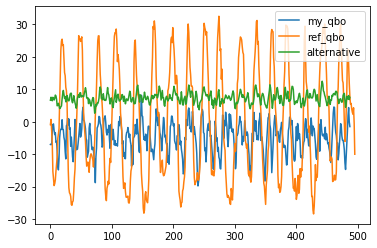

In [7]:
plt.plot(my_qbo, label="my_qbo")
plt.plot(ref_qbo[:, -1], label="ref_qbo")
plt.plot(alternative_qbo, label="alternative")
plt.legend()
nc.close()

<h3>Deseasonalize data </h3>

In [8]:
print(calc.deseasonalize_time_series.__doc__)


    Deseasonalize a time series by subtracting the respective mean and dividing by the respective
    standard deviation.

    For example: Monthly time series. From each value, subtract the alltime mean for this month and
    divide by the alltime standard deviation for this month.

    If the length of the series is no multiple of the period length, values from behind will be
    dropped until this condition is met.

    Args:
        series (np.ndarray): time series to deseasonalize
        period_length (int): length of one period
            Defaults to 12

    Returns:
        Deseasonalize time series
    


In [9]:
my_deseasonalized_qbo = calc.deseasonalize_time_series(my_qbo)
ref_deseasonalized_qbo = calc.deseasonalize_time_series(ref_qbo[:, -1])
alternative_deseasonalized_qbo = calc.deseasonalize_time_series(alternative_qbo)

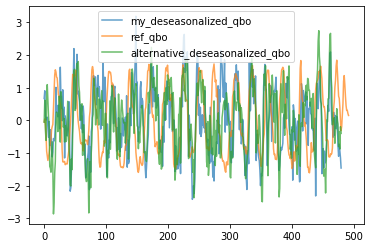

In [10]:
plt.plot(my_deseasonalized_qbo, label="my_deseasonalized_qbo", alpha=0.7)
plt.plot(ref_deseasonalized_qbo, label="ref_qbo", alpha=0.7)
plt.plot(alternative_deseasonalized_qbo, label="alternative_deseasonalized_qbo", alpha=0.7)
plt.legend()
nc.close()